In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [22]:
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 20
DATASET_PATH = '/kaggle/input/hand-gestures/leapGestRecog/' 

In [23]:
def create_dataset_symlink(base_path='/kaggle/working/gesture_dataset'):
    if not os.path.exists(base_path):
        os.makedirs(base_path)
        for person_folder in os.listdir(DATASET_PATH):
            person_path = os.path.join(DATASET_PATH, person_folder)
            if os.path.isdir(person_path):
                for gesture_folder in os.listdir(person_path):
                    gesture_path = os.path.join(person_path, gesture_folder)
                    if os.path.isdir(gesture_path):
                        target_folder = os.path.join(base_path, gesture_folder)
                        if not os.path.exists(target_folder):
                            os.makedirs(target_folder)
                        for img in os.listdir(gesture_path):
                            src_img = os.path.join(gesture_path, img)
                            dst_img = os.path.join(target_folder, f"{person_folder}_{img}")
                            os.symlink(src_img, dst_img)
    return base_path

In [24]:
new_dataset_path = create_dataset_symlink()

In [25]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    new_dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    new_dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 106s 204ms/step - accuracy: 0.6873 - loss: 0.9102 - val_accuracy: 0.9482 - val_loss: 0.2136
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 207ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9465 - val_loss: 0.4004
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 207ms/step - accuracy: 0.9890 - loss: 0.0295 - val_accuracy: 0.8967 - val_loss: 0.4527
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 107s 212ms/step - accuracy: 0.9933 - loss: 0.0256 - val_accuracy: 0.8115 - val_loss: 0.9603
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 206ms/step - accuracy: 0.9942 - loss: 0.0231 - val_accuracy: 0.8932 - val_loss: 0.8445
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 209ms/step - accuracy: 0.9963 - loss: 0.0103 - val_accuracy: 0.9440 - val_loss: 0.3015
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 205ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.8555 - val_loss: 0.9249
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 103s 204ms/step - accuracy: 0.9968 -

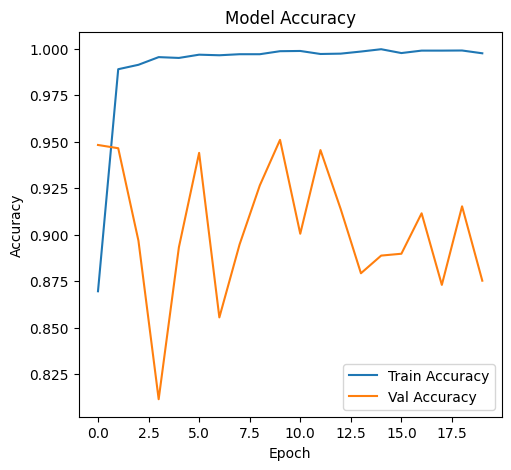

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

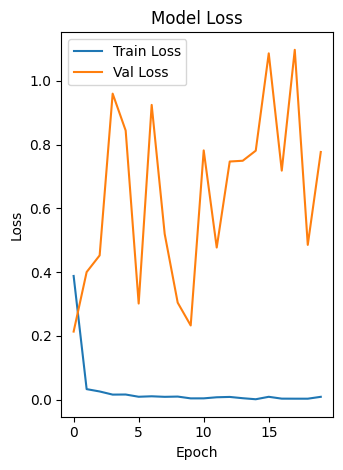

In [30]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step
Classification Report:

               precision    recall  f1-score   support

      01_palm       0.09      0.10      0.10       400
         02_l       0.10      0.08      0.09       400
      03_fist       0.08      0.08      0.08       400
04_fist_moved       0.10      0.14      0.12       400
     05_thumb       0.10      0.05      0.06       400
     06_index       0.09      0.11      0.10       400
        07_ok       0.09      0.09      0.09       400
08_palm_moved       0.06      0.06      0.06       400
         09_c       0.10      0.07      0.08       400
      10_down       0.09      0.13      0.10       400

     accuracy                           0.09      4000
    macro avg       0.09      0.09      0.09      4000
 weighted avg       0.09      0.09      0.09      4000



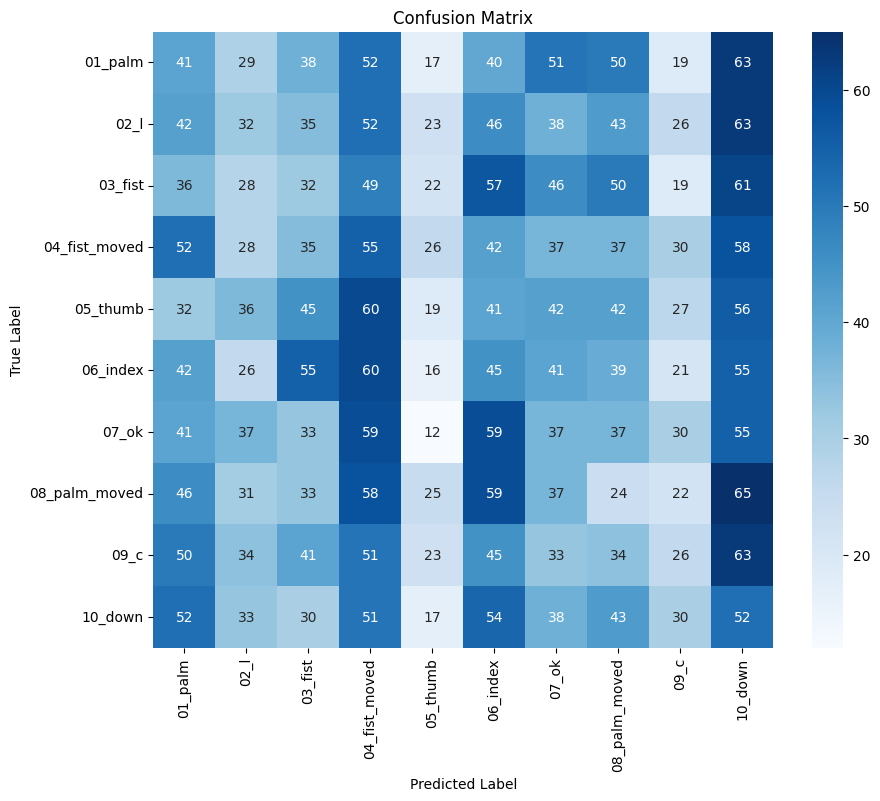

In [32]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [33]:
def predict_gesture(img_path):
    original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    resized_for_model = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img_array = resized_for_model.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=-1)   # (64, 64, 1)
    img_array = np.repeat(img_array, 3, axis=-1)      # (64, 64, 3)
    img_array = np.expand_dims(img_array, axis=0)     # (1, 64, 64, 3)

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_labels = list(train_gen.class_indices.keys())
    
    predicted_label = class_labels[class_idx].split('_')[1]  # Take 'palm', 'index', etc.

    print(f"Predicted gesture: {predicted_label.capitalize()}")  # capitalize for neatness

    plt.figure(figsize=(6, 6), dpi=120)
    plt.imshow(original_img, cmap='gray', interpolation='nearest')
    plt.title(f"Prediction: {predicted_label.capitalize()}", fontsize=16)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted gesture: Palm


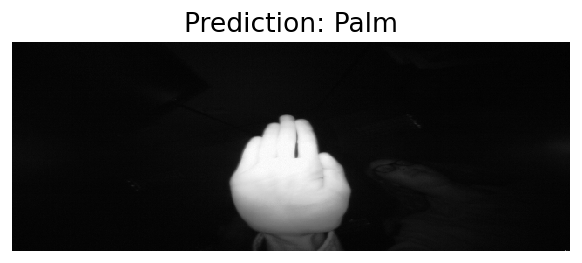

In [34]:
# === TEST EXAMPLE === #
predict_gesture('/kaggle/input/hand-gestures/leapGestRecog/00/01_palm/frame_00_01_0013.png')  # Replace with your image path

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted gesture: Index


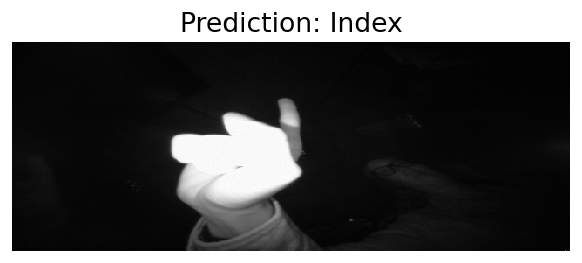

In [35]:
predict_gesture('/kaggle/input/hand-gestures/leapGestRecog/00/06_index/frame_00_06_0023.png')  # Replace with your image path

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted gesture: Down


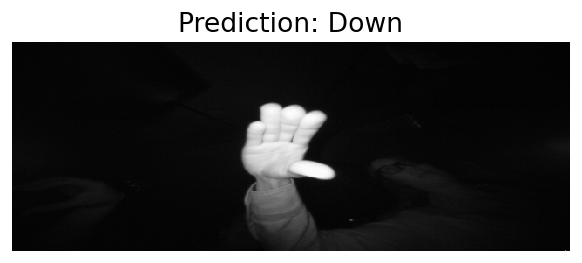

In [36]:
predict_gesture('/kaggle/input/hand-gestures/leapGestRecog/00/10_down/frame_00_10_0019.png')  # Replace with your image path

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted gesture: Ok


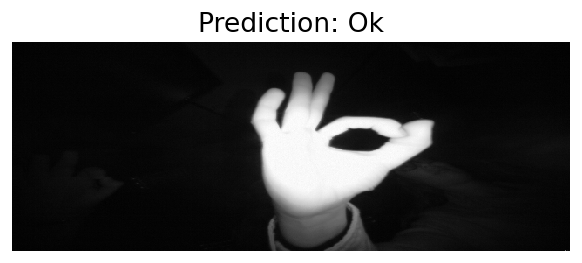

In [37]:
predict_gesture('/kaggle/input/hand-gestures/leapGestRecog/00/07_ok/frame_00_07_0005.png')  # Replace with your image path

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted gesture: Palm


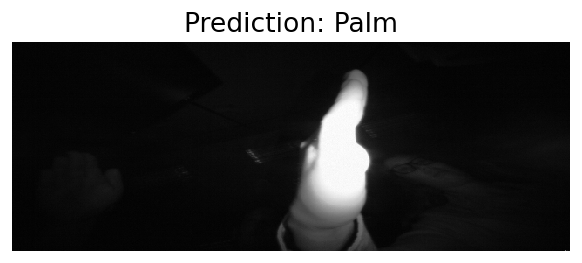

In [38]:
predict_gesture('/kaggle/input/hand-gestures/leapGestRecog/00/08_palm_moved/frame_00_08_0006.png')  